In [1]:
from PyQt5.QtGui import QPainter, QFont, QColor, QFontDatabase, QImage, QFontMetrics
from PyQt5.QtWidgets import QApplication
import os
import pandas as pd
import json
import re
import random

app = QApplication([])


In [ ]:
# === Замууд ===
csv_path = "reduced_dataset.csv"
output_image_dir = "../../dataset_QA/QA/images"
output_json_path = "../../dataset_QA/QA/qa_data.json"

In [20]:
# === Фонт жагсаалт (давхардалгүй) ===
bichmel_fonts = list(set([
    '../fonts/Bichimel.ttf',
    '../fonts/mnglwritingotf.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Hawang.ttf',
    '../fonts/UnicodeFontForShare/VertNote/Mongol Bichimel.ttf'
]))
formal_fonts = list(set([
    '../fonts/Chagan.ttf',
    '../fonts/Garchag.ttf',
    '../fonts/Syurga.ttf',
    '../fonts/Urga.ttf',
    '../fonts/UnicodeFontForShare/Microsoft/monbaiti 501.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Qagan.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Sonin.ttf',
    '../fonts/UnicodeFontForShare/VertNote/Mongol Garchig.ttf'
]))
nariin_font = list(set([
    '../fonts/MONGOLIANSYSTEM0.97.TTF',
    '../fonts/NotoSansMongolian-Regular.ttf',
    '../fonts/UnicodeFontForShare/Mongol tolbo/Hutuch/Hutuch-Light.ttf',
    '../fonts/UnicodeFontForShare/VertNote/Mongol Web.ttf'
]))
zavaan_font = list(set([
    '../fonts/mngltitleotf.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Garqig.ttf',
]))


In [21]:

all_fonts = list(set(bichmel_fonts + formal_fonts + nariin_font + zavaan_font))

In [ ]:


# === Нийт фонт ===
all_fonts = list(set(bichmel_fonts + formal_fonts + nariin_font + zavaan_font))

# === CSV унших ===
df = pd.read_csv(csv_path)

# === Текст цэвэрлэх ===
def clean_text(text):
    return re.sub(r"[^\wᠠ-ᡳᡠ ]+", "", text)

# === Эхлэх индекс ===
image_index = 176595
start_row = image_index // 3

entries = []

for idx, row in df.iloc[start_row:].iterrows():
    word = str(row['label']).strip()
    word = clean_text(word)

    if len(word) == 0:
        continue

    sampled_fonts = random.sample(all_fonts, 3)

    for font_path in sampled_fonts:
        font_name = os.path.basename(font_path)
        image_filename = f"{image_index}.png"
        relative_path = os.path.join(output_image_dir, image_filename).replace("\\", "/")

        entry = {
            "label": word,
            "font": font_name,
            "path": relative_path
        }

        entries.append(entry)
        image_index += 1

# === JSON-д хадгалах ===
with open(output_json_path, "w", encoding="utf-8") as f:
    json.dump(entries, f, ensure_ascii=False, indent=2)

print(f"✅ JSON үүсгэгдлээ: {output_json_path} ({len(entries)} бичлэг)")


✅ JSON үүсгэгдлээ: ../../dataset_QA/QA/qa_data.json (333234 бичлэг)


In [2]:
json_path = "../adiya/web_scrap/scraped_data/president_news.json"
output_dir = "../../datasetnew/dataset/new_data.json"

# === Фонт жагсаалт (нэр → зам) ===
all_fonts = [
    '../fonts/Bichimel.ttf',
    '../fonts/mnglwritingotf.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Hawang.ttf',
    '../fonts/UnicodeFontForShare/VertNote/Mongol Bichimel.ttf',
    '../fonts/Chagan.ttf',
    '../fonts/Garchag.ttf',
    '../fonts/Syurga.ttf',
    '../fonts/Urga.ttf',
    '../fonts/UnicodeFontForShare/Microsoft/monbaiti 501.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Qagan.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Sonin.ttf',
    '../fonts/UnicodeFontForShare/VertNote/Mongol Garchig.ttf',
    '../fonts/MONGOLIANSYSTEM0.97.TTF',
    '../fonts/NotoSansMongolian-Regular.ttf',
    '../fonts/UnicodeFontForShare/Mongol tolbo/Hutuch/Hutuch-Light.ttf',
    '../fonts/UnicodeFontForShare/VertNote/Mongol Web.ttf',
    '../fonts/mngltitleotf.ttf',
    '../fonts/UnicodeFontForShare/UnicodeFONT MUNKH/MunkhGalUNICODE/Menk Garqig.ttf',
]

font_map = {os.path.basename(f): f for f in all_fonts}

# === Зураг үүсгэх функц ===
def generate_image(path, text, font_path, font_size=40):
    try:
        font_id = QFontDatabase.addApplicationFont(font_path)
        families = QFontDatabase.applicationFontFamilies(font_id)
        if not families:
            return False
        font_family = families[0]
        font_obj = QFont(font_family, font_size)

        metrics = QFontMetrics(font_obj)
        text_width = metrics.horizontalAdvance(text)
        text_height = metrics.height()

        padding = 20
        image_width = text_width + padding * 2
        image_height = text_height + padding * 2

        image = QImage(image_width, image_height, QImage.Format_ARGB32)
        image.fill(QColor("white"))

        painter = QPainter(image)
        painter.setFont(font_obj)
        painter.setPen(QColor("black"))
        painter.drawText(padding, text_height, text)
        painter.end()

        return image.save(path)
    except Exception as e:
        print(f"⚠️ Алдаа: {e}")
        return False

# === JSON файл унших ===
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

generated = 0
skipped = 0

for entry in data:
    label = entry["label"]
    font_name = entry["font"]
    image_path = entry["path"]

    font_path = font_map.get(font_name)
    if not font_path:
        print(f"❌ Фонт олдсонгүй: {font_name}")
        skipped += 1
        continue

    full_path = os.path.abspath(image_path)
    os.makedirs(os.path.dirname(full_path), exist_ok=True)

    if os.path.exists(full_path):
        # Already exists, skip
        continue

    success = generate_image(full_path, label, font_path)
    if success:
        generated += 1
    else:
        skipped += 1

print(f"✅ Дууслаа! Нийт: {len(data)}, Үүсгэсэн: {generated}, Алгассан: {skipped}")

TypeError: string indices must be integers

In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("qa.csv")

# Combine all text from 'question' and 'answer' columns
all_text = ' '.join(df['question'].astype(str)) + ' ' + ' '.join(df['answer'].astype(str))

# Clean the text (optional, depending on how your clean_text() works)
# all_text = clean_text(all_text)

# Split into words
words = all_text.split()

# Count the words
word_count = len(words)

print(f"📊 CSV файлд нийт {word_count} үг байна.")


📊 CSV файлд нийт 693746 үг байна.


C:\Users\domogdog\AppData\Local\Temp\ipykernel_10508\4116264693.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


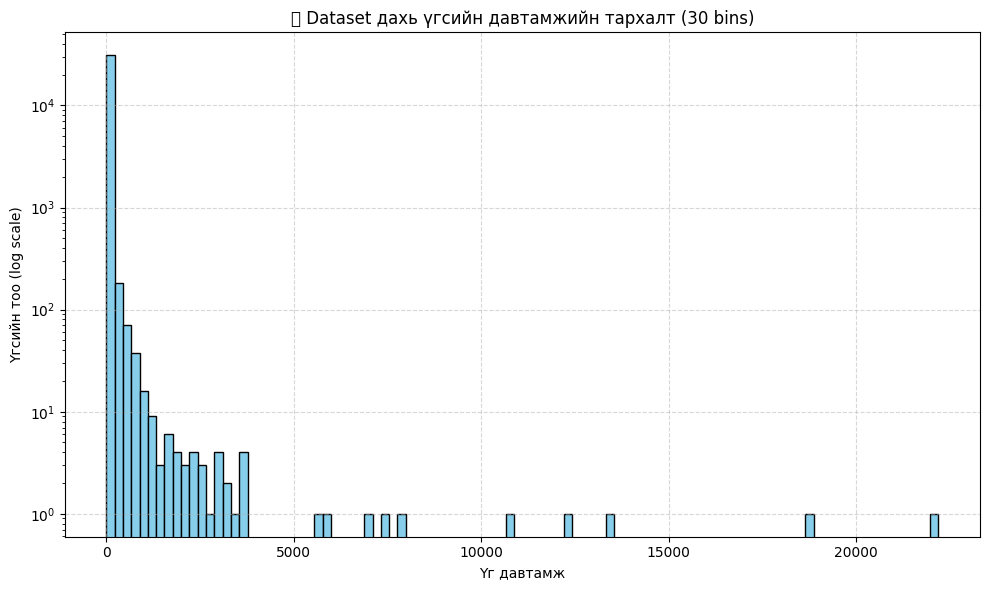

In [8]:
import matplotlib.pyplot as plt

# Үг бүрийн давтамж
word_freqs = list(word_counter.values())

# 30 bin-тэй Histogram
plt.figure(figsize=(10, 6))
plt.hist(word_freqs, bins=100, color='skyblue', edgecolor='black', log=True)

plt.title("📊 Dataset дахь үгсийн давтамжийн тархалт (30 bins)")
plt.xlabel("Үг давтамж")
plt.ylabel("Үгсийн тоо (log scale)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



In [12]:
import pandas as pd
import re
import os
import random
from collections import defaultdict
import csv

# === Paths ===
csv_path = "qa.csv"
output_csv_path = "reduced_dataset.csv"
images_folder = "images"  # where your images are stored

# === Clean text function ===
def clean_text(text):
    return re.sub(r"[^\w ]", "", text)

# === Load dataset ===
df = pd.read_csv(csv_path)

# === Collect all image entries ===
entries = []

for idx, row in df.iterrows():
    for col in ['question', 'answer']:
        sentence = str(row[col])
        sentence = clean_text(sentence)
        for word in sentence.split():
            # Assuming image filenames were based on index
            image_index = len(entries)
            entry = {
                "label": word,
            }
            entries.append(entry)

# === Group by word ===
word_to_entries = defaultdict(list)
for entry in entries:
    word_to_entries[entry["label"]].append(entry)

# === Reduce dataset ===
reduced_dataset = []

for word, group in word_to_entries.items():
    n = len(group)
    if n <= 5:
        reduced_dataset.extend(group)
    elif n <= 20:
        keep_n = int(n * 0.5)
        reduced_dataset.extend(random.sample(group, keep_n))
    else:
        keep_n = max(1, int(n * 0.1))
        reduced_dataset.extend(random.sample(group, keep_n))

# === Save to reduced CSV ===
with open(output_csv_path, "w", encoding="utf-8", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=["label"])
    writer.writeheader()
    writer.writerows(reduced_dataset)

print(f"✅ Reduced dataset saved to {output_csv_path}")
print(f"🔢 Original entries: {len(entries)} → Reduced entries: {len(reduced_dataset)}")


✅ Reduced dataset saved to reduced_dataset.csv
🔢 Original entries: 575161 → Reduced entries: 111078


In [25]:


csv_path = "qa.csv"
output_json_path = "../../dataset_QA/QA/qa_data.json"

# === Suffixes ===
suffixes = {
    "Nominative": "",
    "Genitive": ["ᠶᠢᠨ", "ᠤᠨ", "ᠦᠨ", "ᠨ"],
    "Accusative": ["ᠶᠢ", "ᠢ"],
    "Dative-Locative": ["ᠳᠤ", "ᠳᠦ", "ᠲᠤ", "ᠲᠦ"],
    "Ablative": ["ᠡᠴᠡ", "ᠠᠴᠠ"],
    "Instrumental": ["ᠪᠡᠷ", "ᠢᠶᠡᠷ", "ᠢᠶᠠᠷ", "ᠪᠠᠷ"],
    "Comitative": ["ᠲᠠᠢ", "ᠲᠡᠢ", "ᠯᠤᠭ᠎ᠠ", "ᠯᠦᠭᠡ"],
    "Directive": ["ᠷᠤᠤ", "ᠷᠦᠦ", "ᠯᠤᠭ᠎ᠠ", "ᠯᠦᠭᠡ"],
    "Plural": ["ᠨᠠᠷ", "ᠨᠡᠷ", "ᠤᠳ", "ᠦᠳ", "ᠨᠤᠭᠤᠳ", "ᠨᠦᠭᠦᠳ", "ᠳ"],
    "Possessive 1st sing": ["ᠮᠢᠨᠢ", "ᠮᠢᠨᠤ"],
    "Possessive 2nd sing": ["ᠴᠢᠨᠢ", "ᠴᠢᠨᠤ"],
    "Possessive 3rd sing": ["ᠨᠢ"],
    "Possessive 1st plur": ["ᠮᠠᠨᠢ", "ᠮᠠᠨᠤ", "ᠪᠢᠳᠡᠨ ᠦ"],
    "Possessive 2nd plur": ["ᠲᠠᠨᠢ", "ᠲᠠᠨᠤ"],
    "Reflexive": ["ᠪᠠᠨ", "ᠪᠡᠨ", "ᠢᠶᠠᠨ", "ᠢᠶᠡᠨ"],
    "Present-Future": ["ᠨ᠎ᠠ", "ᠨᠡ", "ᠤᠨ᠎ᠠ", "ᠦᠨᠡ", "ᠮᠤᠢ", "ᠮᠦᠢ", "ᠶᠤᠮ"],
    "Past definite": ["ᠪᠠ", "ᠪᠡ", "ᠯᠠ", "ᠯᠡ", "ᠵᠢ"],
    "Past indefinite": ["ᠵᠠᠢ", "ᠵᠡᠢ", "ᠯᠤᠭ᠎ᠠ", "ᠯᠦᠭᠡ"],
    "Past imperfect": ["ᠭᠰᠠᠨ", "ᠭᠰᠡᠨ", "ᠳᠠᠭ", "ᠳᠡᠭ"],
    "Imperative": ["ᠭᠲᠤᠨ", "ᠭᠲᠦᠨ", "", "ᠤᠭᠲᠤᠨ", "ᠦᠭᠲᠦᠨ"],
    "Verbal noun": ["ᠬᠤ", "ᠬᠦ", "ᠭᠰᠠᠨ", "ᠭᠰᠡᠨ", "ᠭᠴᠢ", "ᠳᠠᠭ", "ᠳᠡᠭ", "ᠮᠠᠷ", "ᠮᠡᠷ"],
    "Imperfective converb": ["ᠵᠤ", "ᠵᠦ", "ᠴᠤ", "ᠴᠦ"],
    "Perfective converb": ["ᠭᠠᠳ", "ᠭᠡᠳ", "ᠠᠳ", "ᠡᠳ"],
    "Conditional converb": ["ᠪᠠᠰᠤ", "ᠪᠡᠰᠦ", "ᠪᠠᠯᠠ", "ᠪᠡᠯᠡ"],
    "Terminative converb": ["ᠭᠳᠠᠯ᠎ᠠ", "ᠭᠳᠡᠯᠡ", "ᠳᠠᠯ᠎ᠠ", "ᠳᠡᠯᠡ"],
    "Contemporative converb": ["ᠮᠠᠭᠴᠠ", "ᠮᠡᠭᠴᠡ"],
    "Successive converb": ["ᠭᠠᠳ", "ᠭᠡᠳ"],
    "Final converb": ["ᠬᠤᠢ ᠳᠤ", "ᠬᠦᠢ ᠳᠦ", "ᠬᠤᠯᠠᠷ", "ᠬᠦᠯᠡᠷ"],
    "Diminutive": ["ᠬᠠᠨ", "ᠬᠡᠨ"],
    "Agentive": ["ᠴᠢ", "ᠴᠢᠨ"],
    "Abstract noun": ["ᠯ", "ᠯᠲᠠ", "ᠯᠲᠡ", "ᠴᠠ", "ᠴᠡ"],
    "Adjective": ["ᠲᠠᠢ", "ᠲᠡᠢ", "ᠯᠢᠭ", "ᠯᠢᠭ", "ᠲᠤ", "ᠲᠦ"],
    "Question": ["ᠤᠤ", "ᠦᠦ", "ᠪᠢᠰᠢᠦ", "ᠪᠢᠰᠢᠦ"]
}

all_suffix_values = []
for v in suffixes.values():
    all_suffix_values.extend(v if isinstance(v, list) else [v])
all_suffix_values = [s for s in all_suffix_values if s]

def clean_text(text):
    return re.sub(r"[^\wᠠ-ᡳᡠ ]+", "", text)

os.makedirs(os.path.dirname(output_json_path), exist_ok=True)
df = pd.read_csv(csv_path)

# Clean and split from both 'question' and 'answer' columns
question_words = []
answer_words = []

for _, row in df.iterrows():
    q = clean_text(str(row["question"])).split()
    a = clean_text(str(row["answer"])).split()
    question_words.extend(q)
    answer_words.extend(a)

question_words = [w for w in question_words if w and w not in all_suffix_values]
answer_words = [w for w in answer_words if w and w not in all_suffix_values]

words = question_words + answer_words  # Нийт 100,000 үг

entries = []
image_index = 0
i = 0


while i < len(words):
    group = [words[i]]
    total_len = len(words[i])
    j = i + 1
    while j < len(words) and len(group) < 3:
        next_word = words[j]
        if total_len + len(next_word) <= 20:
            group.append(next_word)
            total_len += len(next_word)
        else:
            break
        j += 1

    full_text = " ".join(group)
    font = random.choice(all_fonts)
    fonts = [os.path.basename(font)] * len(group)

    entries.append({
        "label": full_text,
        "fonts": fonts,
        "path": f"../../dataset_QA/QA/images/{image_index}.png"
    })

    image_index += 1
    i = j

with open(output_json_path, "w", encoding="utf-8") as f:
    json.dump(entries, f, ensure_ascii=False, indent=2)

print(f"✅ {len(entries)} бичлэгтэй JSON үүсгэгдлээ: {output_json_path}")


✅ 189530 бичлэгтэй JSON үүсгэгдлээ: ../../dataset_QA/QA/qa_data.json


In [27]:
json_path = "../../dataset_QA/QA/qa_data.json"
output_dir = "../../dataset_QA/QA/images"

# === Font list (from earlier) ===

font_map = {os.path.basename(f): f for f in all_fonts}

# === Normalize font list to match words ===
def normalize_fonts_and_words(words, fonts):
    if len(words) == len(fonts):
        return words, fonts
    elif len(words) < len(fonts):
        fonts = fonts[:len(words)]
    else:
        fonts += [fonts[-1]] * (len(words) - len(fonts))
    return words, fonts

# === Image generator ===
def generate_image(path, words, fonts, font_size=40):
    try:
        total_width = 0
        word_metrics = []

        for word, font_name in zip(words, fonts):
            font_path = font_map.get(font_name)
            if not font_path:
                print(f"⚠️ Font not found: {font_name}")
                return False

            font_id = QFontDatabase.addApplicationFont(font_path)
            families = QFontDatabase.applicationFontFamilies(font_id)
            if not families:
                print(f"⚠️ Font families not loaded: {font_name}")
                return False

            font_family = families[0]
            font_obj = QFont(font_family, font_size)
            metrics = QFontMetrics(font_obj)
            word_width = metrics.horizontalAdvance(word)
            word_height = metrics.height()
            word_metrics.append((word, font_obj, word_width, word_height))
            total_width += word_width + 10  # space between words

        image_height = max(h for _, _, _, h in word_metrics) + 40
        image = QImage(total_width + 40, image_height, QImage.Format_ARGB32)
        image.fill(QColor("white"))

        painter = QPainter(image)
        x = 20

        for word, font_obj, word_width, word_height in word_metrics:
            painter.setFont(font_obj)
            painter.setPen(QColor("black"))
            painter.drawText(x, word_height + 10, word)
            x += word_width + 10

        painter.end()
        return image.save(path)

    except Exception as e:
        print(f"⚠️ Error: {e}")
        return False

# === Read JSON and generate images ===
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

generated = 0
skipped = 0

for entry in data:
    label = entry["label"]
    fonts = entry["fonts"]
    image_path = entry["path"]

    words = label.split()
    words, fonts = normalize_fonts_and_words(words, fonts)

    full_path = os.path.abspath(image_path)
    os.makedirs(os.path.dirname(full_path), exist_ok=True)

    if os.path.exists(full_path):
        continue

    success = generate_image(full_path, words, fonts)
    if success:
        generated += 1
    else:
        skipped += 1

print(f"✅ Done! Total: {len(data)}, Generated: {generated}, Skipped: {skipped}")


KeyboardInterrupt: 